# Una introducción al filtro de Kalman

## 1. El filtro de Kalman discreto

### El proceso de estimación
El filtro de Kalman aborda el problema general de intentar estimar el estado $x\in\mathbb{R}^n$ de un proceso controlado de tiempo discreto regido por la siguiente ecuación lineal estocástica de diferencias

\begin{equation}
x_k=A x_{k-1}+Bu_{k-1}+w_{k-1},
\tag{1.1}
\end{equation}

con una medición $z\in\mathbb{R}^n$ que es

\begin{equation}
z_k=Hx_k+v_k.
\tag{1.2}
\end{equation}

Las variables aleatorias $w_k$ y $v_k$ representan el ruido del proceso y de medición respectivamente. Se asume que son variables independientes y se distribuyen normalmente.

\begin{align}
p(w)\sim N(0,Q)\tag{1.3} \\
p(v)\sim N(0,R)
\tag{1.4}
\end{align}

En la práctica las matrices de covarianza $Q$ y $R$ pueden variar en cada paso de tiempo o medición, sin embargo, se asume que son constantes.

La matriz $A$ de $n\times n$ relaciona el estado del paso de tiempo anterior $k-1$ con el estado del paso actual $k$, en la ausencia de la función de conducción y de ruido del proceso. La matriz $A$ puede cambiar en cada paso de tiempo, pero se asume que es constante.

La matriz $B$ de $n\times l$ relaciona la entrada de control opcional $u\in\mathbb{R}^n$ con el estado $x$. 

La matriz $H$ de $n\times m$ relaciona el estado con la medición $z_k$. La matriz $H$ puede cambiar en cada paso de tiempo o medición, pero se asume que es constante.

### Orígenes computacionales del filtro
Se define $\hat{x}_k^-\in\mathbb{R}^n$ como el estado estimado *a priori* en el paso $k$ dado el conocimiento del proceso $k-1$, y se define $\hat{x}_k \in\mathbb{R}^n$ como el estado estimado *a posteriori* en el paso $k$ dada la medición $z_k$. Podemos definir los errores estimados *a priori* y *a posteriori* como

\begin{align}
e_k^- &:= x_k-\hat{x}_k^-\\
e_k &:= x_k-\hat{x}_k.
\end{align}

La covarianza del error estimado *a priori* es

\begin{equation}
P_k^-=E[e_k^- {e_k^-}^T],
\tag{1.5}
\end{equation}

y la covarianza del error estimado *a posteriori* es 

\begin{equation}
P_k=E[e_k {e_k}^T].
\tag{1.6}
\end{equation}

Para derivar las ecuaciones del filtro de Kalman empezamos con el objetivo de encontrar una ecuación que calcula el estado *a posteriori* $\hat{x}_k$ como una combinación lineal entre la estimación *a priori* $\hat{x}_k^-$ y una ponderación de la diferencia entre la medición actual $z_k$ y la predicción de la medición $H \hat{x}_k^-$, como se muestra en la siguiente ecuación

\begin{equation}
\hat{x}_k= \hat{x}_k^- + K(z_k-H\hat{x}_k^-).
\tag{1.7}
\end{equation}

La diferencia $z_k-H\hat{x}_k^-$ es llamada la medicción de innovación, o el residuo. El residuo representa la discrepancia entre el valor predicho $H \hat{x}_k^-$ y el valor actual $z_k$. 

La matriz $K$ de $n\times m$ se escoge de modo que sea el *beneficio* que minimiza la covarianza del error estimado *a posteriori*. Después de hacer esa minimización se obtiene que la matriz $K$ en el paso de tiempo $k$ tiene la siguiente forma

\begin{equation}
K_k = P_k^- H^T(H P_k^- H^T+R)^{-1} =\frac{P_k^- H^T}{H P_k^- H^T+R}.
\tag{1.8}
\end{equation}

De la ecuación anterior podemos ver que si la covarianza del error de la medición se aproxima a cero, el *beneficio* $K$ pondera el residuo de forma más fuerte, específicamente
$$
\lim_{R_k\rightarrow 0} K_k=H^{-1}.
$$

Por otro lado, si la covarianza del error estimado *a priori* $P_k^-$ se aproxima a cero, el *beneficio* $K$ pondera el residuo de forma más débil, específicamente
$$
\lim_{P_k^-\rightarrow 0} K_k=0.
$$

### Orígenes probabilísticos del filtro

La justificación de $(1.7)$ se basa en la probabilidad de la estimación a priori $\hat{x}_k^-$ condicionada con todas las mediciones anteriores $z_k$. Por ahora es suficiente señalar que el filtro de Kalman mantiene los dos primeros momentos de la distribución del estado,

\begin{align*}
E[x_k]&=\hat{x}_k\\
E[(x_k-\hat{x}_k)(x_k-\hat{x}_k)^T]&=P_k.
\end{align*}

El estado estimado *a posteriori* refleja la media de la distribución del estado. La covarianza del error del estado estimado *a posteriori* refleja la varianza de la distribución del estado, en otras palabras,
$$
p(x_k|z_k)\sim N(E[x_k],E[(x_k-\hat{x}_k)(x_k-\hat{x}_k)^T])=N(\hat{x}_k,P_k).
$$

### EL algoritmo del filtro de Kalman discreto

El filtro de Kalman estima un proceso usando una forma de control con *retroalimentación*: el filtro estima el estado del proceso en algún tiempo y entonces obtiene una retroalimentación en forma de (ruido) mediciones. Podemos clasificar las ecuaciones del filtro de Kalman en dos grupos: ecuaciones de **actualización de tiempo** y ecuaciones de **actualización de mediciones**. Las ecuaciones de actualización de tiempo son responsables de proyectar hacia adelante (en tiempo) el estado actual y la estimaciones de la covarianza del error para obtener las estimaciones *a priori* del siguiente paso de tiempo. Las ecuaciones de actualización de mediciones son responsables de las retroalimentaciones, en otras palabras, incorporan una nueva medición en la estimación *a priori* para obtener una estimación *a posteriori* mejorada.

Las ecuaciones de actualización de tiempo son las siguientes:

\begin{align}
\hat{x}_k^-&=A \hat{x}_{k-1}+Bu_{k-1}\tag{1.9}\\
P_k^-&=AP_{k-1}A^T+Q\tag{1.10}
\end{align}

Las ecuaciones de actualización de mediciones son las siguientes:

\begin{align}
K_k&=P_k^- H^T(H P_k^- H^T+R)^{-1} \tag{1.11}\\
\hat{x}_k &= \hat{x}_k^- + K(z_k-H\hat{x}_k^-) \tag{1.12}\\
P_k &= (I-K_k H)P_k^- \tag{1.13}
\end{align}

Después de cada par de actualización del tiempo y medición, el proceso se repite con la estimación previa *a posteriori* usada para predecir una nueva estimación *a priori*. 

### Parámetros del filtro y ajustes

En la implementación actual del filtro, la covarianza del ruido de la medición $R$ es usualmente medida antes de la operación del filtro. Medir $R$ es posible porque se necesita medir el proceso de todas formas (mientras el filtro opera) así que generalmente deberíamos tomar algunas mediciones fuera de linea para de terminar la varianza del ruido de la medición.

La determinación de la covarianza del ruido del proceso $Q$ es generalmente más difícil ya que no tenemos la habilidad de observar directamente el proceso que estamos estimando. A veces un proceso simple puede producir resultados aceptables si uno "inyecta" suficiente incertidumbre en el proceso mediante la selección de $Q$. Ciertamente en este caso uno esperaría que las mediciones del proceso son de confianza. 

En cualquier caso, si tenemos o no una base racional para escoger los parámetros, muchas veces se puede obtener un mejor desempeño del filtro *ajustando* los parámetros $Q$ y $R$. El ajuste es usalmente realizado fuera de linea, frecuentemente con la ayuda de otro (distinto) filtro de Kalman en un proceso que generalmente se refiera como *identificación del sistema*.

Además, notamos que bajo condiciones donde $Q$ y $R$ son de hecho constantes, la covarianza del error estimado $P_k$ y la ganancia $K_k$ se estabilizan rápidamente y entonces permanecen constantes. Si este es el caso, estos parámetros pueden ser pre-calculados usando un filtro fuera de linea o bien determinando el valor del estado estable de $P_k$. Sin embargo, es frecuente el caso donde el error de la medición no permanece constante. 

## 2. El filtro de Kalman extendido

### El proceso de estimación

Ahora nos enfocaremos en las situaciones cuando el proceso a estimar y (o) la relación de la medición del proceso no es lineal. Algunas de las aplicaciones más interesantes y exitosas del filtro de Kalman han sido en tales situaciones. Un filtro de Kalman que linealiza sobre la media actual y la covarianza se conoce como filtro de Kalman extendido (FKE).

Podemos linealizar la estimación en la estimación actual usando las derivadas parciales de las funciones del proceso y medición incluso ante relaciones no lineales. Para hacer esto debemos modificar el material presentado en la sección 1. Asumamos nuevamante que el proceso tiene un vector de estado $x\in\mathbb{R}^n$, pero que el proceso es regido por una ecuación no lineal estocástica de diferencias

\begin{equation}
x_k=f(x_{k-1},u_{k-1},w_{k-1}),
\tag{2.1}
\end{equation}
 con una medición $z\in\mathbb{R}^n$ 
 
\begin{equation}
z_k=h(x_k,v_k).
\tag{2.2}
\end{equation}

En la práctica uno no conoce los valores del ruido $w_k$ y $v_k$ en cada paso de tiempo. Sin embargo, uno puede aproximar el vector de estado y de medición como

\begin{equation}
\tilde{x}_k = f(\hat{x}_{k-1},u_{k-1},0)
\tag{2.3}
\end{equation}
y

\begin{equation}
\tilde{z}_k=h(\tilde{x}_k,0), 
\tag{2.4}
\end{equation}

donde $\hat{x}_k$ es algún estado estimado *a posteriori*.

Es importante notar que una falla fundamental de FKE es que las distribuciones de las variables aleatorias ya no son normales después de someterse a sus respectivas transformaciones no lineales.

### Orígenes computacionales del filtro

Para estimar un proceso con relaciones no lineales, comenzamos escribiendo las nuevas ecuaciones que linealizan una estimación de las ecuaciones $(2.3)$ y $(2.4)$

\begin{align}
x_k&\approx \tilde{x}_k +A(x_{k-1}-\hat{x}_{k-1})+Ww_{k-1} \tag{2.5}\\
z_k&\approx\tilde{z}_k+H(x_k)-\tilde{x}_k+V v_k \tag{2.6}
\end{align}

donde

* $x_k$ y $z_k$ son los vectores reales de estado y medición
* $\tilde{x}_k$ y $\tilde{x}_k$ son los vectores aproximados de $(2.3)$ y $(2.4)$
* $\hat{x}_k$ es la estimación *a posteriori* del estado en el paso $k$
* $w_k$ y $v_k$ representan el ruido como en la sección 1
* $A$ es la matriz Jacobiana de las derivadas parciales de $f$ respecto  a $x$
* $W$ es la matriz Jacobiana de las derivadas parciales de $f$ respecto  a $w$
* $H$ es la matriz Jacobiana de las derivadas parciales de $f$ respecto  a $x$
* $V$ es la matriz Jacobiana de las derivadas parciales de $f$ respecto  a $v$

Ahora, definimos una nueva notación para el error de la predicción

\begin{equation}
\tilde{e}_{x_k}=x_k-\tilde{x}_k,
\tag{2.7}
\end{equation}

y para el residuo de la medición

\begin{equation}
\tilde{e}_{z_k}=z_k-\tilde{z}_k.
\tag{2.8}
\end{equation}

Recuerde que en la práctica uno no tiene acceso a $x_k$ en $(2.7)$, por el otro lado, uno si tiene acceso a $z_k$ en $(2.8)$. Usando $(2.5)$ y $(2.6)$ podemos escribir

\begin{align}
\tilde{e}_{x_k}&\approx A(x_{k-1}-\hat{x}_{k-1})+\varepsilon_k, \tag{2.9}\\
\tilde{e}_{z_k}&\approx H(x_k)-\tilde{x}_k+\eta_k, \tag{2.10}
\end{align}

donde $\varepsilon_k$ y $\eta_k$ representan nuevas variables aleatorias independientes con media cero y matrices de covarianza $WQW^T$ y $VRV^T$ respectivamente. 

Note que las ecuaciones $(2.9)$ y $(2.10)$ son lineales, y se parecen mucho a las ecuaciones $(1.1)$ y $(1.2)$. Esto nos motiva a usar el residuo real de la medición $\tilde{e}_{x_k}$ y un segundo filtro de Kalman para estimar el error de la estimación $\tilde{e}_{x_k}$. Esta estimación, llámela $\hat{e}_k$, puede ser usada junto a $(2.7)$ para obtener una estimación del estado *a posteriori* para el proceso original como

\begin{equation}
\hat{x}_k=\tilde{x}_k+\hat{e}_k.
\tag{2.11}
\end{equation}

Las variables aleatorias de $(2.9)$ y $(2.10)$ tienen aproximadamente las siguientes distribuciones de probabilidad:

\begin{align}
p(\tilde{e}_{x_k}) &\sim N(0,E[\tilde{e}_{x_k}\tilde{e}_{x_k}^T])\\
p(\varepsilon_k) &\sim N(0,WQ_kW^T)\\
p(\eta_k)&\sim N(0,VR_kV^T)
\end{align}

Dadas estas aproximaciones y dejando el valor preicho de $\hat{e}_k$ gual a cero, la ecuación del filtro de Kalman usada para estimar $\hat{e}_k$ es

\begin{equation}
\hat{e}_k=K_k \tilde{e}_{z_k}.
\tag{2.12}
\end{equation}

Sustituyendo esta ecuación en $(2.11)$ y usando $(2.8)$ vemos que no es necesario el segundo filtro de Kalman:

\begin{equation}
\hat{x}_k= \tilde{x}_{k}+K_k \tilde{e}_{z_k}.
\tag{2.13}
\end{equation}

Las ecuaciones de actualización de tiempo del FKE son las siguientes:

\begin{align}
\hat{x}_{k}^- &=f(\hat{x}_{k-1},u_{k-1},0) \tag{2.14}\\
P_k^- &= A_kP_{k-1}A_k^T + W_kQ_{k-1}W_k^T \tag{2.15}
\end{align}

Las ecuaciones de actualización de mediciones del FKE son las siguientes:

\begin{align}
K_k &=P_k^- H_k^T(H_kP_k^- H_k^T+V_kR_k V_k^T)^{-1} \tag{2.16}\\
\hat{x}_k &= \hat{x}_k^- + K_k(z_k-h(\hat{x}_k^-,0))\tag{2.17}\\
P_k &=(I-K_k H_k)P_k^- \tag{2.18}
\end{align}

## 3. El filtro de Kalman en acción

En esta sección usaremos el filtro de Kalman para estimar el valor de una constante cualquiera. Asumamos que podemos tomar mediciones de la constante, pero estas están comprometidas por $0.1$ unidades. En este ejemplo, el proceso esta regido por la siguiente ecuación

$$
x_k=A x_{k-1}+ w_k,
$$
con una medición $z\in\mathbb{R}$

$$
z_k=x_k+v_k.
$$

Entonces tenemos que el estado no cambia en cada paso $(A=1)$, no hay control de entrada $(u=0)$, el ruido de la medición es del estado directamente $(H=1)$.

Las ecuaciones de actualización de tiempo son las siguientes:

\begin{align}
\hat{x}_k^-&=A \hat{x}_{k-1}\\
P_k^-&=P_{k-1}A^T+Q
\end{align}

Las ecuaciones de actualización de mediciones son las siguientes:

\begin{align}
K_k&=\frac{P_k^-}{P_k^- +R}\\
\hat{x}_k &= \hat{x}_k^- + K(z_k-\hat{x}_k^-)\\
P_k &= (1-K_k )P_k^- 
\end{align}

Presumiendo una varianza muy pequeña del proceso tomamos $Q=10^{-5}$. Además, tomamos $\hat{x}_0=0$ y $P_0=1$.

### Las simulaciones

Consideremos el escalar $X=-0.37727$ y simulemos 100 mediciones que se distribuyen normalmente con media igual a $c$ y con desviación estándar $R=0.1$.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

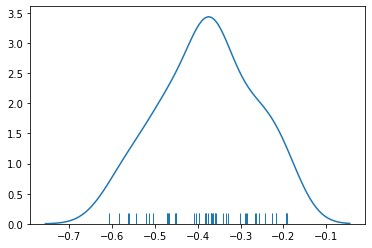

In [2]:
# Simulación del filtro de Kalman

# Valor a predecir
X = -0.37727

# Desviación estándar
R = 0.1 

# Cantidad de mediciones
mediciones = 50

# Generar mediciones con distribución normal
s = np.random.normal(X, R, mediciones)
sns.distplot(s,hist=False, rug=True);

Verifiquemos que la variable $v$ se distribuye normalmente con desviación estándar $R$

0    0.10872
dtype: float64


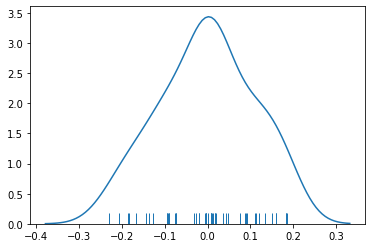

In [3]:
error = []
for i in range(mediciones):
    error.append(s[i]-X)
    
df = pd.DataFrame(error)
sns.distplot(error,hist=False, rug=True)
print(df.var()**0.5)

Vemos que el valor de la desviación estándar es muy cercano al que queremos $R\approx 0.1$.

A continuación, aplicamos el filtro de Kalman:

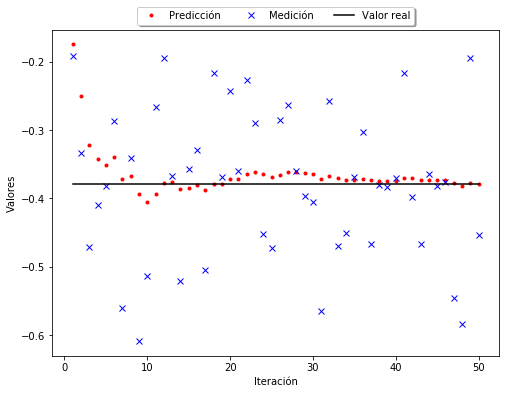

In [4]:
Q = 10**(-5)
# Condiciones iniciales
P = 1
x = 0
# Lista predicciones
pred = []

for i in range(mediciones):
    med = s[i]
    
    # Time update equations
    #x = x 
    P_menos = P+Q

    # Measurement update equations
    K = P_menos/(P_menos + R)
    x = x+K*(med-x)
    P = (1-K)*P_menos
    
    pred.append(x)

# Gráfico
plt.figure(figsize = (8,6))
plt.plot(range(1,mediciones+1), pred,'.',c='r')
plt.plot(range(1,mediciones+1), s,'x',c='b')
plt.plot(range(1,mediciones+1), [x]*mediciones,'-',c='black')
plt.legend(['Predicción','Medición','Valor real'],loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
plt.ylabel('Valores')
plt.xlabel('Iteración')
plt.show()

Veamos el comportamiento del filtro para otros valores de $R$

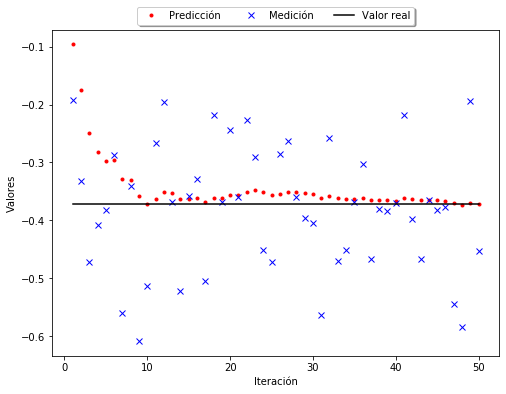

In [5]:
# R 100 veces más grande que el valor real
R = 1
Q = 10**(-5)
# Condiciones iniciales
P = 1
x = 0
# Lista predicciones
pred = []

for i in range(mediciones):
    med = s[i]
    
    # Time update equations
    #x = x 
    P_menos = P+Q

    # Measurement update equations
    K = P_menos/(P_menos + R)
    x = x+K*(med-x)
    P = (1-K)*P_menos
    
    pred.append(x)

# Gráfico
plt.figure(figsize = (8,6))
plt.plot(range(1,mediciones+1), pred,'.',c='r')
plt.plot(range(1,mediciones+1), s,'x',c='b')
plt.plot(range(1,mediciones+1), [x]*mediciones,'-',c='black')
plt.legend(['Predicción','Medición','Valor real'],loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
plt.ylabel('Valores')
plt.xlabel('Iteración')
plt.show()

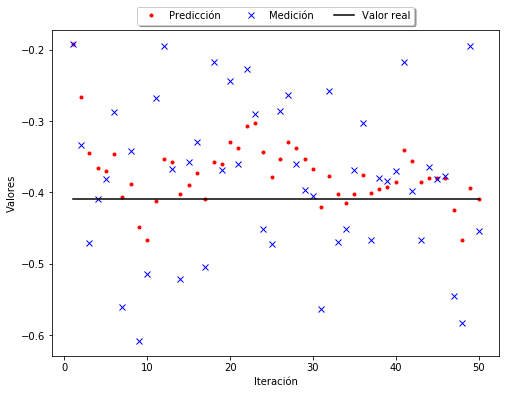

In [6]:
# R 100 veces más pequeña que el valor real
R = 0.0001
Q = 10**(-5)
# Condiciones iniciales
P = 1
x = 0
# Lista predicciones
pred = []

for i in range(mediciones):
    med = s[i]
    
    # Time update equations
    #x = x 
    P_menos = P+Q

    # Measurement update equations
    K = P_menos/(P_menos + R)
    x = x+K*(med-x)
    P = (1-K)*P_menos
    
    pred.append(x)

# Gráfico
plt.figure(figsize = (8,6))
plt.plot(range(1,mediciones+1), pred,'.',c='r')
plt.plot(range(1,mediciones+1), s,'x',c='b')
plt.plot(range(1,mediciones+1), [x]*mediciones,'-',c='black')
plt.legend(['Predicción','Medición','Valor real'],loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
plt.ylabel('Valores')
plt.xlabel('Iteración')
plt.show()

Si bien la estimación de una constante es relativamente sencilla, claramente demuestra el funcionamiento del filtro de Kalman. 